In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [29]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.erythroid.doublet_removed_processed.20200114.h5ad')

Only considering the two last: ['.20200114', '.h5ad'].
Only considering the two last: ['.20200114', '.h5ad'].


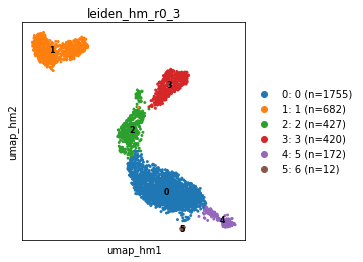

In [30]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_hm_r0_3')

In [33]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_hm_r0_3', regroups={
    'Erythroid (embryonic)': '1',
    'Early erythroid (embryonic)': '3',
    'Early erythroid': '2',
    'Erythroid (fetal)': ['0', '5', '6'],
})

In [34]:
ad.obs.rachel_annot3.value_counts()

Erythroid (fetal)              1939
Erythroid (embryonic)           682
Early erythroid                 427
Early erythroid (embryonic)     420
Name: rachel_annot3, dtype: int64

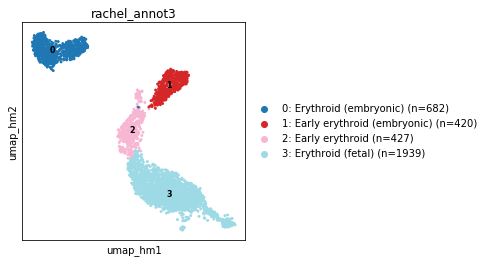

In [35]:
ss.lib.clear_colors(ad)
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [36]:
ad.write('fetal_skin.erythroid.doublet_removed_processed.20200403.h5ad', compression='lzf')